# Interactively plotting unstructured grid MPAS data with Datashader and Geoviews

This example demonstrates several key points

1. How to use geoviews/holoviews for interactive plotting in a Jupyter Notebook. The plotting is interactive
in the sense that you can pan and zoom the data. Doing so will reveal greater and greater data fidelity.
2. Using Datashader to perform background rendering in place of Matplotlib. Unlike Matplotlib, Datashader
was designed for performance with large data sets.
3. How to make use of the MPAS file's connectivity information to render data on the native grid, and also
avoid costly Delaunay triangulation that is required if the MPAS connectivity information is note used.
4. Rendering data that is sampled on both the 'primal' and 'dual' MPAS mesh


## The data
The global data sets used in this example are from the same experiment, but run at several resolutions from
30km to 3.75km. Due to their size, the higher resolution data sets are ownly distributed with two variables
in them:
+ relhum_200hPa: Relative humidity vertically interpolated to 200 hPa
+ vorticity_200hPa: Relative vorticity vertically interpolated to 200 hPa

The relhum_200hPa is computed on the MPAS 'primal' mesh, while the vorticity_200hPa is computed on the MPAS
'dual' mesh. Note that data may also be sampled on the edges of the primal mesh. This example does not include
cover edge-centered data.

These data are courtesy of NCAR's Falko Judt, and were produced as part of the DYAMOND initiative: 
 http://dx.doi.org/10.1186/s40645-019-0304-z . 
 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
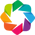

In [1]:
import math as math

import cartopy.crs as ccrs
import dask.dataframe as dd
import holoviews as hv
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.tri import Triangulation
import numba
from numba import jit


from holoviews import opts

import holoviews.operation.datashader as hds 
import geoviews.feature as gf # only needed for coastlines

hv.extension("bokeh","matplotlib")


opts.defaults(
    opts.Image(width=800, height=400),
    opts.RGB(width=800, height=400))

# Set up Dask

disabled for now as it results in a significant slowdown :-(

In [2]:
n_workers = 1
#from dask.distributed import Client

#client = Client(n_workers=n_workers)
#client

# Utility functions

In [3]:
# This funtion splits a global along longitude
#
# Examine the X coordinates of each triangle in 'tris'. Return an array of 'tris' where only those triangles
# with legs whose length is less than 't' are returned. 
# 
def unzipMesh(x,tris,t):
    return tris[(np.abs((x[tris[:,0]])-(x[tris[:,1]])) < t) & (np.abs((x[tris[:,0]])-(x[tris[:,2]])) < t)]



In [4]:
# Compute the signed area of a triangle
#
def triArea(x,y,tris):
    return ((x[tris[:,1]]-x[tris[:,0]]) * (y[tris[:,2]]-y[tris[:,0]])) - ((x[tris[:,2]]-x[tris[:,0]]) * (y[tris[:,1]]-y[tris[:,0]]))

In [5]:
# Reorder triangles as necessary so they all have counter clockwise winding order. CCW is what Datashader and MPL
# require.
#
def orderCCW(x,y,tris):
    tris[triArea(x,y,tris)<0.0,:] = tris[triArea(x,y,tris)<0.0,::-1]
    return(tris)


In [6]:
# Create a Holviews Triangle Mesh suitable for rendering with Datashader
#
# This function returns a Holoviews TriMesh that is created from a list of coordinates, 'x' and 'y',
# an array of triangle indices that addressess the coordinates in 'x' and 'y', and a data variable 'var'. The
# data variable's values will annotate the triangle vertices
#
def createHVTriMesh(x,y,triangle_indices, var,n_workers=1):
    # Declare verts array
    verts = np.column_stack([x, y, var])


    # Convert to pandas
    verts_df  = pd.DataFrame(verts,  columns=['x', 'y', 'z'])
    tris_df   = pd.DataFrame(triangle_indices, columns=['v0', 'v1', 'v2'])

    # Convert to dask
    verts_ddf = dd.from_pandas(verts_df, npartitions=n_workers)
    tris_ddf = dd.from_pandas(tris_df, npartitions=n_workers)

    # Declare HoloViews element
    tri_nodes = hv.Nodes(verts_ddf, ['x', 'y', 'index'], ['z'])
    trimesh = hv.TriMesh((tris_ddf, tri_nodes))
    return(trimesh)

In [15]:
###############################################################################
# Triangulate MPAS primary mesh:
#
# Triangulate each polygon in a heterogenous mesh of n-gons by connecting
# each internal polygon vertex to the first vertex. Uses the MPAS
# auxilliary variables verticesOnCell, and nEdgesOnCell.
#
# The function is decorated with Numba's just-in-time compiler so that it is translated into
# optimized performance for better peformance
#
@jit(nopython=True)
def triangulatePoly(verticesOnCell, nEdgesOnCell):

    # Calculate the number triangles. nEdgesOnCell gives the number of vertices for each cell (polygon)
    # The number of triangles per polygon is the number of vertices minus 2.
    #
    nTriangles = np.sum(nEdgesOnCell - 2)

    triangles = np.ones((nTriangles, 3), dtype=np.int64)
    nCells = verticesOnCell.shape[0]
    triIndex = 0
    for j in range(nCells):
        for i in range(nEdgesOnCell[j]-2):
            triangles[triIndex][0] = verticesOnCell[j][0]
            triangles[triIndex][1] = verticesOnCell[j][i+1]
            triangles[triIndex][2] = verticesOnCell[j][i+2]
            triIndex += 1

    return triangles

# Load data and coordinates

The dyamond_1 data set is available in several resolutions, ranging from 30km to 3.75km. 

Currently, because of their size, these data are stored on Glade. We'll need to figure out how we want to allow users 
to access them from NCAR's Dash repo.

In [16]:
# Load data

#datafile = ('/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/3.75km/diag.2016-08-20_00.00.00.nc','/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/3.75km/x1.41943042.grid.nc' )
#datafile = ('/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/7.5km/diag.2016-08-20_00.00.00.nc','/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/7.5km/x1.10485762.grid.nc' )
#datafile = ('/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/15km/diag.2016-08-20_00.00.00.nc','/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/15km/x1.2621442.grid.nc' )
datafile = ('/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/30km/diag.2016-08-20_00.00.00.nc','/Users/clyne/Data/MPAS/FalkoJudt/dyamond_1/30km/x1.655362.grid.nc' )

primalVarName = 'relhum_200hPa'
dualVarName = 'vorticity_200hPa'
central_longitude = 0.0

ds = xr.open_mfdataset(datafile, decode_times=False)
primalVar = ds[primalVarName].isel(Time=0).values
dualVar = ds[dualVarName].isel(Time=0).values



# Fetch lat and lon coordinates for the primal and dual mesh.
lonCell = ds['lonCell'].values * 180.0 / math.pi
latCell = ds['latCell'].values * 180.0 / math.pi
lonCell = ((lonCell - 180.0) % 360.0) - 180.0

lonVertex = ds['lonVertex'].values * 180.0 / math.pi
latVertex = ds['latVertex'].values * 180.0 / math.pi
lonVertex = ((lonVertex - 180.0) % 360.0) - 180.0

# Example 1 - Using MPAS's cell connectivity array to plot primal mesh data

In this example we use the MPAS `cellsOnVertex` auxilliary variable, which defines mesh connectivity for the MPAS grid.
Specifically, this variable tells us the cell IDs for each cell that contains each vertex.

The benefits of this are twofold: 1. We're using the actual mesh description from the MPAS output file; and 2. 
For large grid this is *much* faster than synthesizing the connectivity information as is done
in the next example

In [17]:
# Get triangle indices for each vertex in the MPAS file. Note, indexing in MPAS starts from 1, not zero :-(
#
tris = ds.cellsOnVertex.values - 1

# The MPAS connectivity array unforunately does not seem to guarantee consistent clockwise winding order, which
# is required by Datashader (and Matplotlib)
#
tris = orderCCW(lonCell,latCell,tris)

# Lastly, we need to "unzip" the mesh along a constant line of longitude so that when we project to PCS coordinates
# cells don't wrap around from east to west. The function below does the job, but it assumes that the 
# central_longitude from the map projection is 0.0. I.e. it will cut the mesh where longitude 
# wraps around from -180.0 to 180.0. We'll need to generalize this
#
tris = unzipMesh(lonCell,tris,90.0)


# Project verts from geographic to PCS coordinates
#
projection = ccrs.Robinson(central_longitude=central_longitude)
xPCS, yPCS, _ = projection.transform_points(ccrs.PlateCarree(), lonCell, latCell).T


trimesh = createHVTriMesh(xPCS,yPCS,tris, primalVar,n_workers=n_workers)

In [18]:

# Use precompute so it caches the data internally
rasterized = hds.rasterize(trimesh, aggregator='mean', precompute=True)
rasterized.opts(tools=['hover'], colorbar=True, cmap='coolwarm') * gf.coastline(projection=projection)

:DynamicMap   []
   :Overlay
      .Image.I     :Image   [x,y]   (x_y z)
      .Coastline.I :Feature   [Longitude,Latitude]

# Example 2 - Synthesizing triangles from points using Delaunay triangulation

In this second example we do not use the triangle connectivity information stored in the MPAS file. Instead we
use Delaunay triangulation to artifically create a triangle mesh. The benefit of this approach is that we do not
need the MPAS cellsOnVertex variable if it is not available. Also, since the triangulation algorithm is run on the 
coordinates after they are projected to meters we do not have to worry about wraparound. The downside is that for
high resolution date Delaunay triangulation is prohibitively expensive. The highest resolution data set included
in this notebook (3.75km) will not triangulate in a reasonable amount of time, if at all 

In [19]:


# Use Delaunay triangulation to generate the triangle connectivity. Note, it's important that the coordinate 
# arrays already be in PCS coordinates (not lat-lon) for the triangulation to perform optimally
#
tris = Triangulation(xPCS,yPCS).triangles

trimesh = createHVTriMesh(xPCS,yPCS,tris, primalVar,n_workers=n_workers)


In [20]:

# Use precompute so it caches the data internally
rasterized = hds.rasterize(trimesh, aggregator='mean', precompute=True)
rasterized.opts(tools=['hover'], colorbar=True, cmap='coolwarm') * gf.coastline(projection=projection)

:DynamicMap   []
   :Overlay
      .Image.I     :Image   [x,y]   (x_y z)
      .Coastline.I :Feature   [Longitude,Latitude]

# Example 3 - Using MPAS's cell connectivity array to plot dual mesh data

In this example we use the MPAS `verticesOnCell` and `nEdgesOnCell` auxilliary variables, which defines mesh connectivity for the
MPAS dual grid.

As with the first example using the MPAS primal grid, data on the dual grid could be plotted by first
triangulating them with, for example, Delaunay triangulation. But using grid's native connectivity information 
is faster.


In [21]:
verticesOnCell = ds.verticesOnCell.values - 1
nEdgesOnCell = ds.nEdgesOnCell.values

# For the dual mesh the data are located on triangle centers, which correspond to cell (polygon) vertices. Here
# we decompose each cell into triangles
#
tris = triangulatePoly(verticesOnCell, nEdgesOnCell)

tris = unzipMesh(lonVertex,tris,90.0)

# Project verts from geographic to PCS coordinates
#
projection = ccrs.Robinson(central_longitude=central_longitude)
xPCS, yPCS, _ = projection.transform_points(ccrs.PlateCarree(), lonVertex, latVertex).T


trimesh = createHVTriMesh(xPCS,yPCS,tris, dualVar,n_workers=n_workers)

In [22]:
rasterized = hds.rasterize(trimesh, aggregator='mean', precompute=True)
rasterized.opts(tools=['hover'], colorbar=True, cmap='coolwarm') * gf.coastline(projection=projection)

:DynamicMap   []
   :Overlay
      .Image.I     :Image   [x,y]   (x_y z)
      .Coastline.I :Feature   [Longitude,Latitude]